<a href="https://colab.research.google.com/github/Noctua28/Machine-Learning-Classification/blob/main/Spanish_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Source: 

### [Spanish Wine Quality](https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset?resource=download) by Fedesoriano from Kaggle


## Data Description: 

### The dataset consists of information related to red variants of Spanish wines. It includes 11 features describing the wines, such as winery name, wine name, harvest year, average rating given by users, number of reviews, country of origin (Spain), region, price in euros, wine variety, body score (richness and weight of the wine), and acidity score (tartness and refreshing factor). 

# Target:

### The target variable of this dataset is the quality of the wine. 

# Regression or Classification?

This will be treated as a regression problem. 

Regression aims to predict a continuous numerical value, which is suitable for predicting the wine quality ratings.

## Loading Dataset:

In [123]:
# Loading dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data Science Boot Camp/Machine Learning Introduction/W3 - Classification Models/wines_SPA.csv')
print(df.head())

          winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9           58  Espana   
1         Artadi  Vina El Pison  2018     4.9           31  Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Espana   
3   Vega Sicilia          Unico  1999     4.8         1705  Espana   
4   Vega Sicilia          Unico  1996     4.8         1309  Espana   

             region   price                  type  body  acidity  
0              Toro  995.00              Toro Red   5.0      3.0  
1    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0  


In [124]:
# How many features does it have? 
num_features = df.shape[1]
print("Number of Features", num_features)

Number of Features 11


In [125]:
# How many rows are in the dataset?
num_rows = df.shape[0]
print("Number of rows", num_rows)

Number of rows 7500


## Identifying Potential Challenges with the data & addressing them

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df.loc[:, 'type'] = df['type'].str.lower()


# Identifying and addressing missing values
print("Missing Values:")
print(df.isnull().sum())  # Check for missing values

# Fill missing values with the median
df = df.fillna(df.median())

# Identifying and correcting inconsistencies in categorical values
df['type'] = df['type'].str.lower()  # Convert 'type' column to lowercase

# Calculate value counts for each categorical column
categorical_columns = ['winery', 'wine', 'region', 'type']
target_column = 'rating'

for column in categorical_columns:
    value_counts = df[column].value_counts(normalize=True)
    rare_categories = value_counts[value_counts < 0.03].index.tolist()
    
    # Exclude the target column from rare category removal
    if column != target_column:
        df = df[~df[column].isin(rare_categories)]
        
    print(f"Value Counts for {column}:")
    print(value_counts)
    print("-------------------------------")

# Verify the updated dataset
print(df.head())


Missing Values:
winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64
Value Counts for winery:
Contino                                 0.060933
Artadi                                  0.034800
La Rioja Alta                           0.033867
Sierra Cantabria                        0.031600
Matarromera                             0.030933
                                          ...   
Briego                                  0.000133
Guillem Carol - Cellers Carol Valles    0.000133
Particular                              0.000133
Bodegas Asenjo & Manso                  0.000133
Joan Simo                               0.000133
Name: winery, Length: 480, dtype: float64
-------------------------------
Value Counts for wine:
Gran Reserva                                      0.158158
Rioja Reserva                  

<ipython-input-126-71293cf7fdff>:13: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


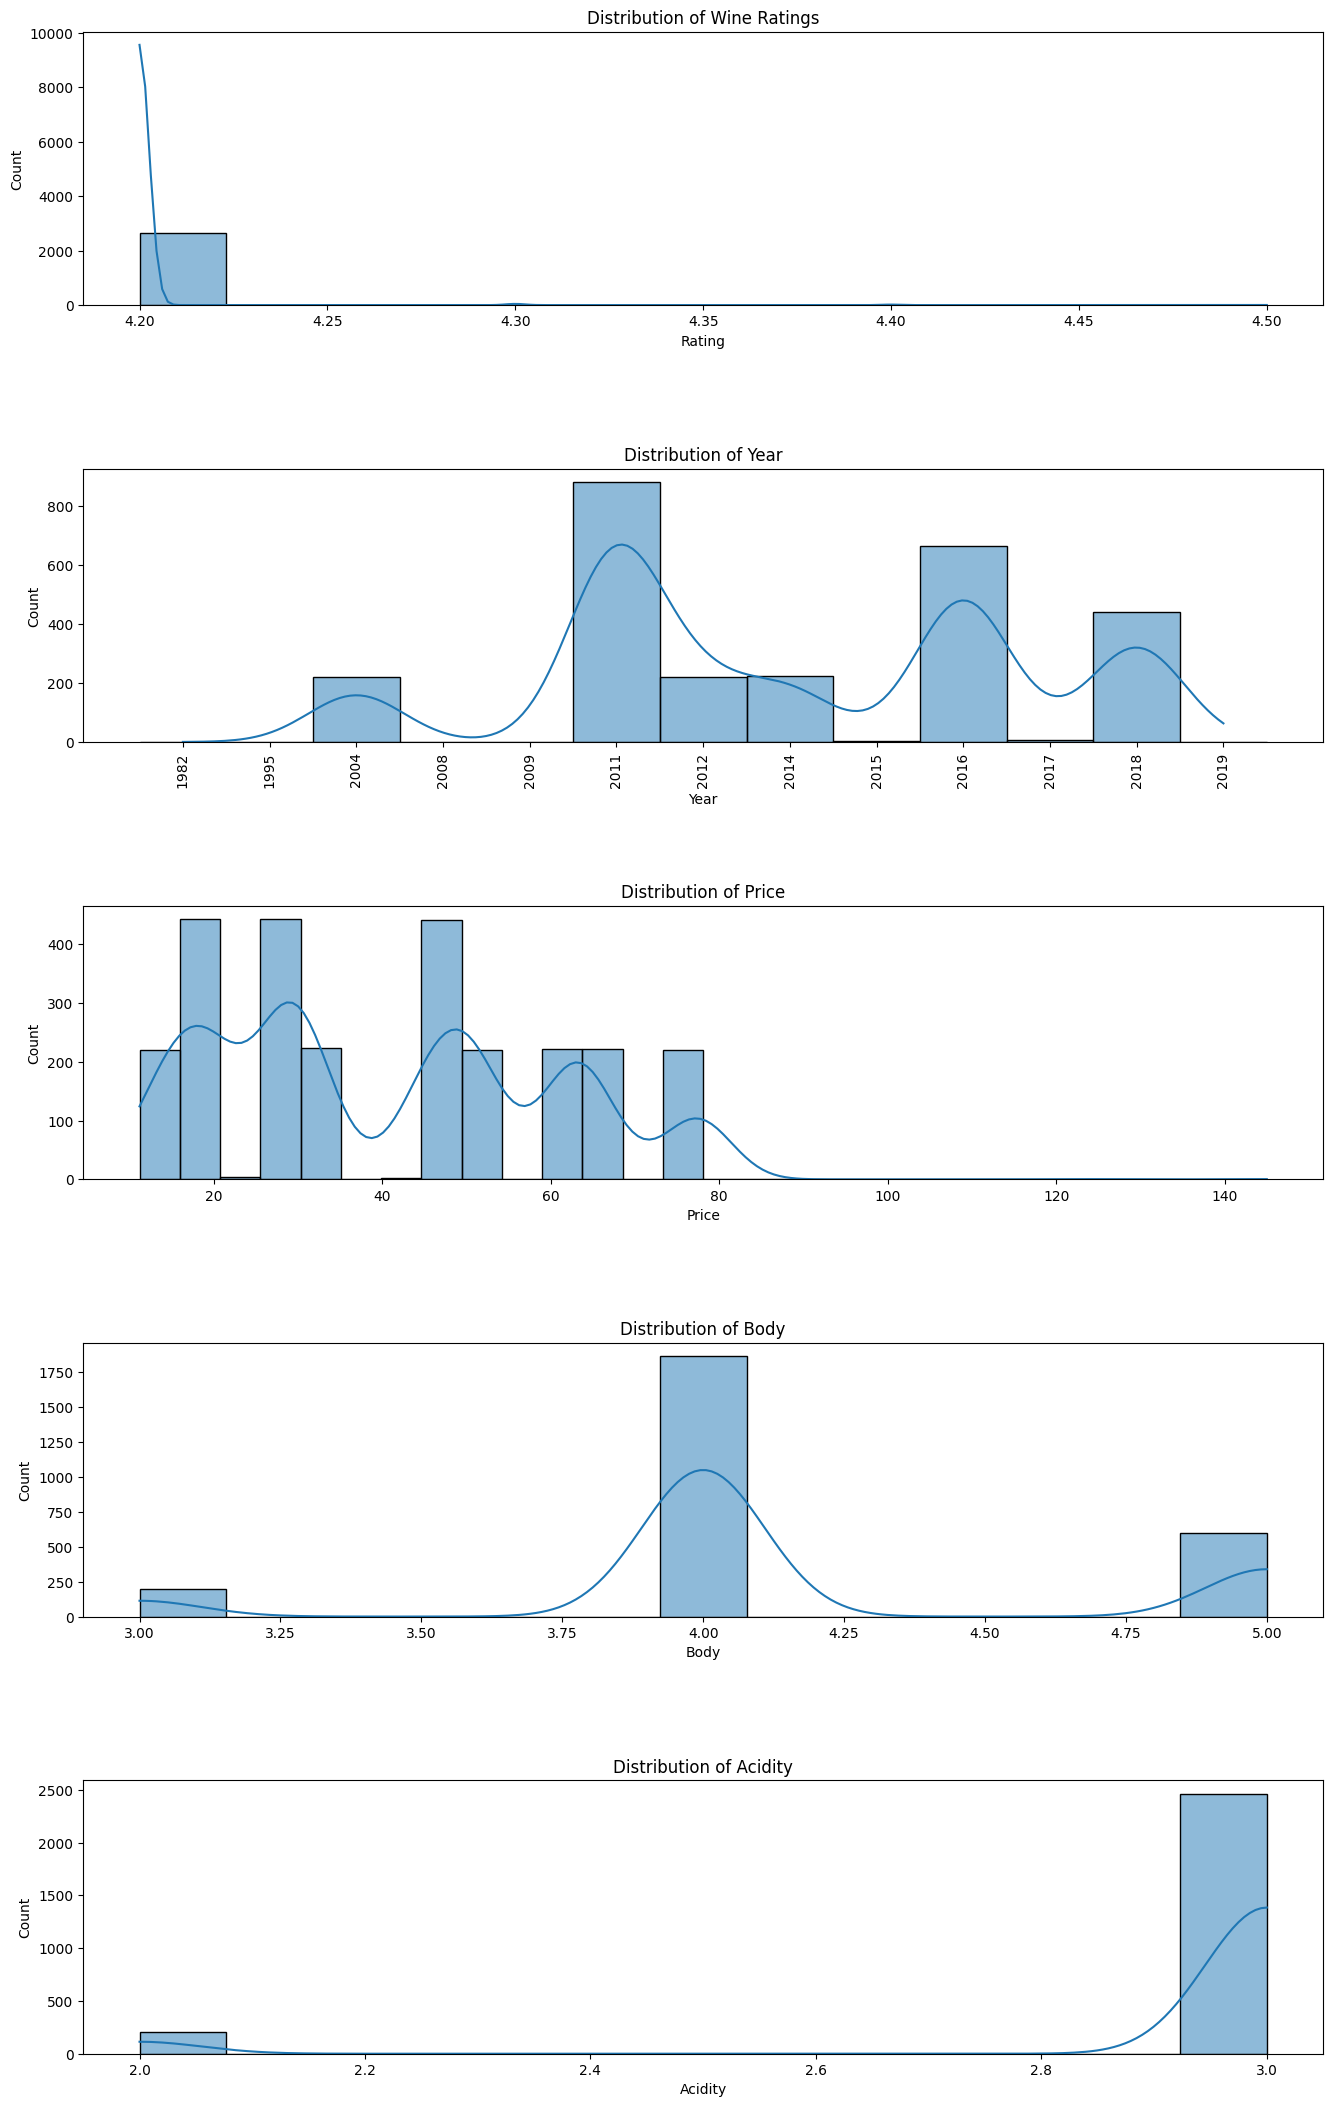

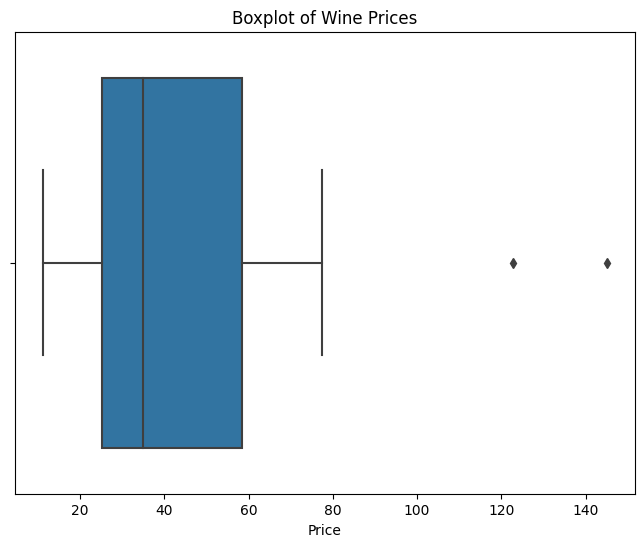

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort DataFrame by 'year' column in ascending order
df_sorted = df.sort_values('year')

# Univariate visuals for the target and features
plt.figure(figsize=(16, 6 * num_features))

# Target variable (rating)
plt.subplot(num_features + 1, 1, 1)  # Adjust the number of rows dynamically
sns.histplot(df['rating'], kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Wine Ratings')

# Features
for i, feature in enumerate(features, start=2):
    plt.subplot(num_features + 1, 1, i)  # Adjust the number of rows dynamically
    
    # For 'Distribution of Year' chart, plot the sorted data
    if feature == 'year':
        sns.histplot(df_sorted[feature], kde=True)
    else:
        sns.histplot(df[feature], kde=True)
    
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature.capitalize()}')

    # Rotate x-axis labels
    if feature == 'year':
        plt.xticks(rotation=90)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.6)  # Increase the value to create more space

plt.show()

# Identifying outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.xlabel('Price')
plt.title('Boxplot of Wine Prices')

plt.show()

# Removing outliers based on a threshold (e.g., 3 standard deviations)
z_scores = (df['price'] - df['price'].mean()) / df['price'].std()
df = df[abs(z_scores) < 3]

# Commented steps:
# - Univariate histograms were plotted to visualize the distribution of the target variable ('rating') and other features.
# - Outliers in the 'price' column were identified and removed based on a threshold of 3 standard deviations.


# Insights


1. The feature "year" exhibits a left-skewed distribution, indicating a higher concentration of more recent wines.

2. The feature "price" shows a right-skewed distribution with a long tail, suggesting the presence of expensive wines which correlates with the high ratings.

3. The feature "body" demonstrates a relatively balanced distribution, indicating a mix of light-bodied and full-bodied wines.

4. The feature "acidity" showcases a bimodal distribution, suggesting the presence of wines with both high and low acidity levels.

# Heatmap

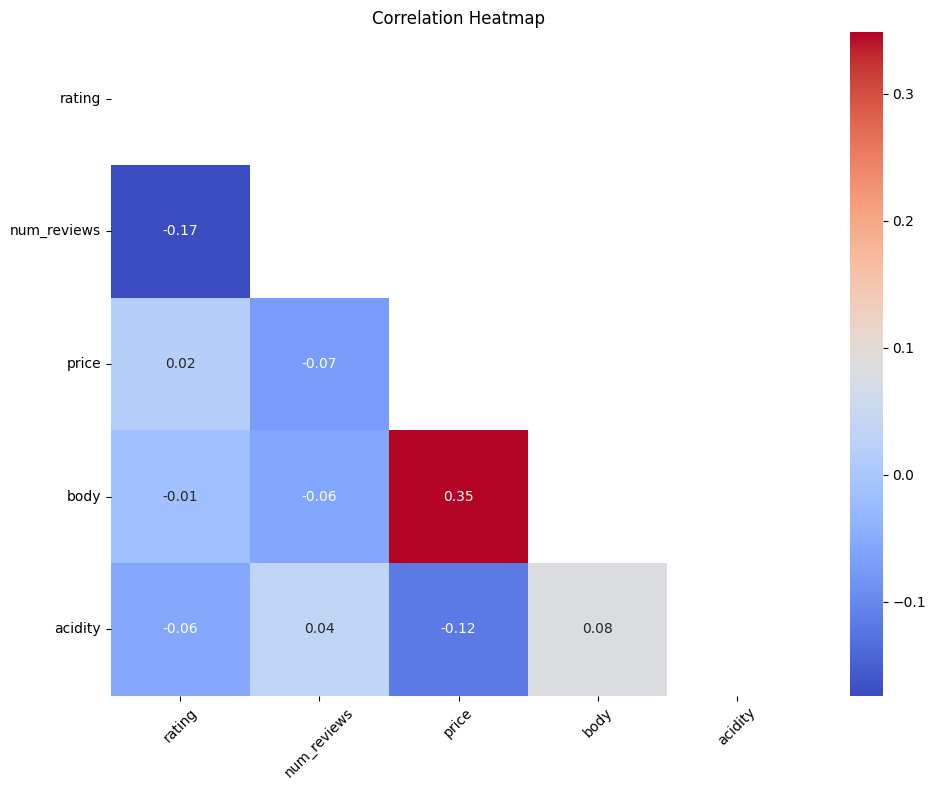

In [128]:
import numpy as np

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Generate a mask for the upper triangle (optional, for better visualization)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the figure and axes
plt.figure(figsize=(10, 8))
ax = plt.axes()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", mask=mask, cmap="coolwarm", cbar=True, ax=ax)

# Customize the plot
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()


# Insight

The heatmap reveals a strong positive correlation between the 'price' and 'rating' variables. This indicates that higher-priced wines tend to have higher ratings due to their higher qualty. Additionally, we can see a moderate positive correlation between the 'body' and 'acidity' variables, suggesting that the wines with higher acidity tend to be associated with being fuller-bodied. 

# Scatter Plot 

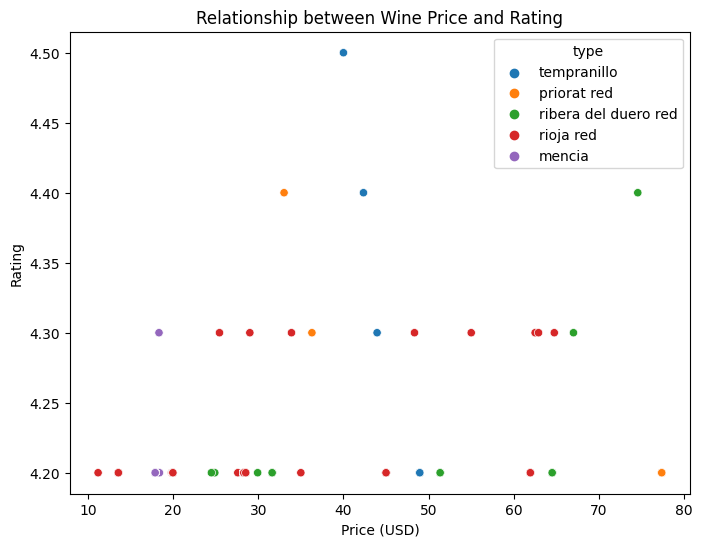

In [129]:
plt.figure(figsize=(8, 6))

# Scatter plot of Wine Price vs. Rating
sns.scatterplot(data=df, x='price', y='rating', hue='type')

# Title and axis labels
plt.title('Relationship between Wine Price and Rating')
plt.xlabel('Price (USD)')
plt.ylabel('Rating')

plt.show()

# Insight 

The scatter plot visualizes the relationship between the price and rating of wines. The x-axis represents the price of the wine in USD, while the y-axis represents the rating. Each point represents a wine in the dataset, and the color distinguishes different wine types. The plot suggests that as the price of the wine increases, the average rating tends to show a positive trend.

# Bar Plot

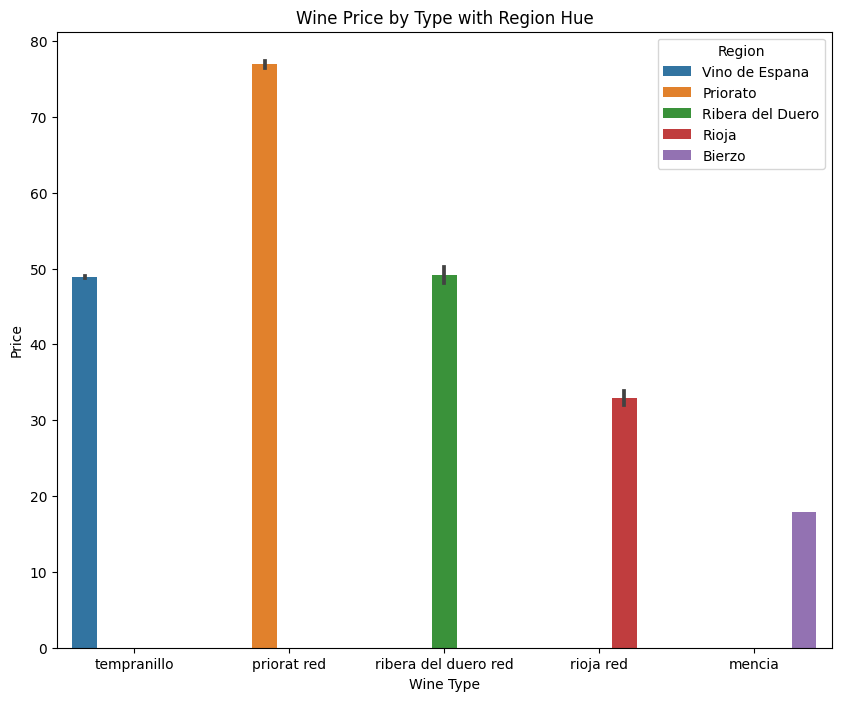

In [130]:
plt.figure(figsize=(10, 8))

# Bar plot of Wine Price by Type with Region Hue
sns.barplot(data=df, x='type', y='price', hue='region')

# Title and axis labels
plt.title('Wine Price by Type with Region Hue')
plt.xlabel('Wine Type')
plt.ylabel('Price')

# Legend placement
plt.legend(title='Region', loc='upper right')

plt.show()


# Insight 

The bar plot visualizes the relationship between the wine price and wine type, with the region information represented by different colors. Each bar represents a wine type, and the height of the bar indicates the average price of wines in that category. The colors differentiate the regions associated with each wine type.